In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("./datas/kindey stone urine analysis.csv")
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [4]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [5]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

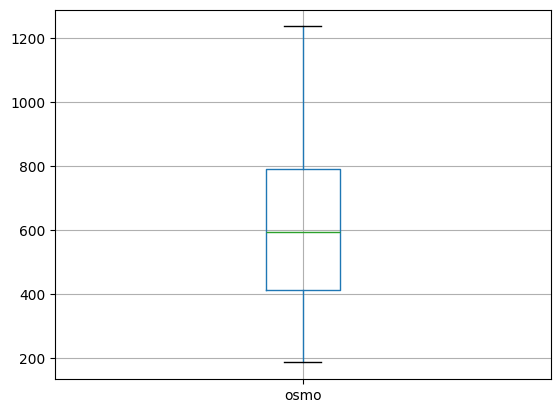

In [6]:
df.boxplot(column='osmo')
plt.show()

In [7]:
data = df.iloc[:,:-1]
target = df.iloc[:,-1]

C:\Users\user\AppData\Local\Temp\ipykernel_9596\3482519800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\user\AppData\Local\Temp\ipykernel_9596\3482519800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
C:\Users\user\AppData\Local\Temp\ipykernel_9596\3482

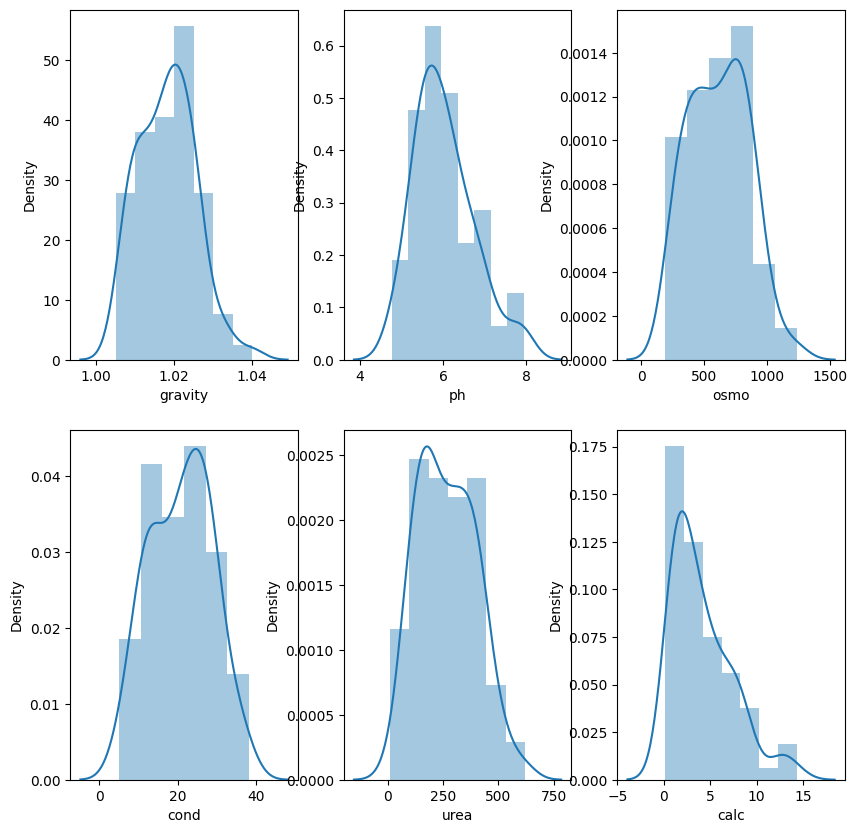

In [8]:
plt.figure(figsize=(10,10))
for i, col in enumerate(data):
    ax = plt.subplot(2,3,i+1)
    sns.distplot(data[col])
plt.show()

In [9]:
target.value_counts()

target
0    45
1    34
Name: count, dtype: int64

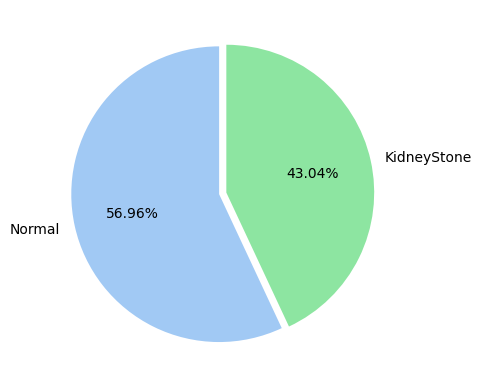

In [10]:
labels = ["Normal","KidneyStone"]
values = target.value_counts().values
colors = sns.color_palette("pastel6")
explode = [0,0.05]

plt.pie(values, labels=labels, startangle=90, autopct='%.2f%%', explode=explode, counterclock=True, colors=colors)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9596\3295204269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette='ocean')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


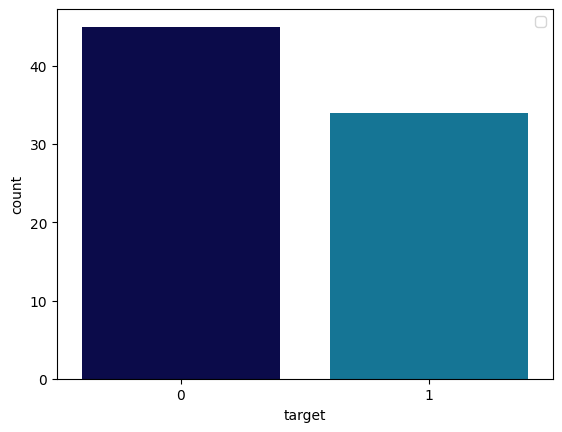

In [11]:
sns.countplot(x=df["target"], palette='ocean')
plt.legend(loc="upper right")
plt.show()

In [12]:
df.corr()

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.253340,0.861466,0.559064,0.823477,0.525699,0.419818
ph,-0.253340,1.000000,-0.238841,-0.097680,-0.275557,-0.119488,-0.112191
osmo,0.861466,-0.238841,1.000000,0.812780,0.871178,0.522979,0.231834
cond,0.559064,-0.097680,0.812780,1.000000,0.495405,0.351030,0.059717
urea,0.823477,-0.275557,0.871178,0.495405,1.000000,0.502327,0.258402
calc,0.525699,-0.119488,0.522979,0.351030,0.502327,1.000000,0.537728
target,0.419818,-0.112191,0.231834,0.059717,0.258402,0.537728,1.000000


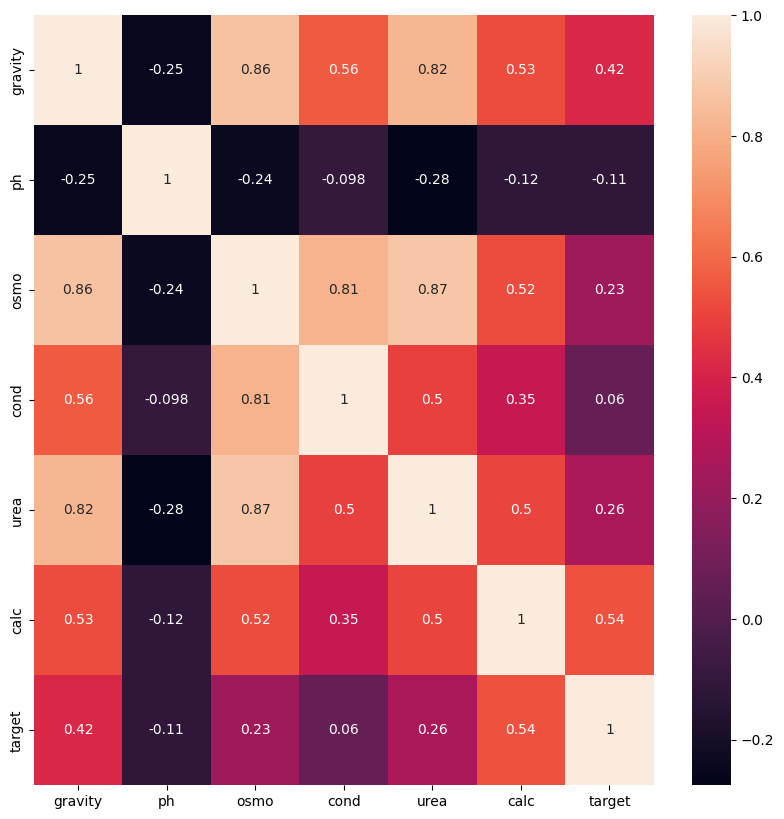

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

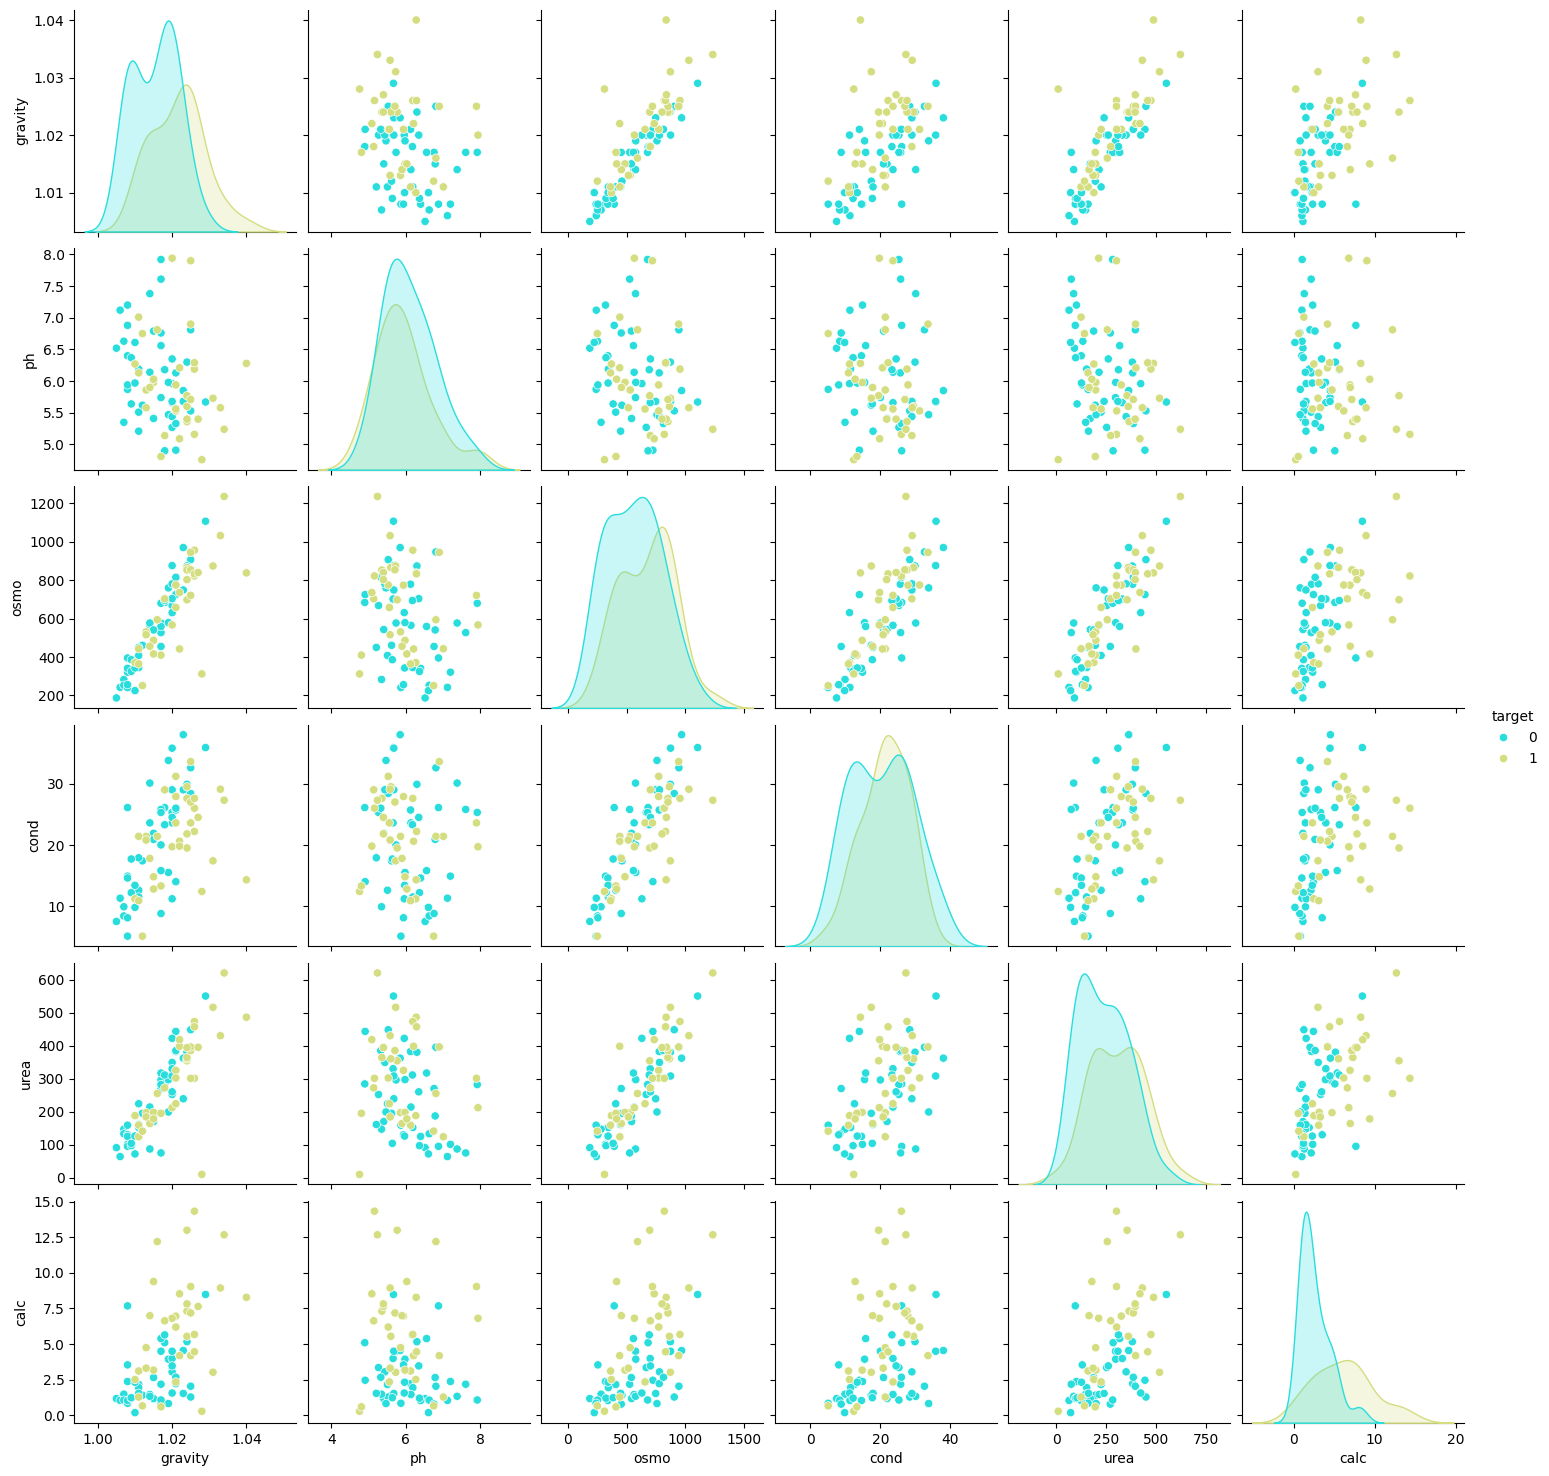

In [14]:
sns.pairplot(df,hue="target", palette="rainbow")
plt.show()

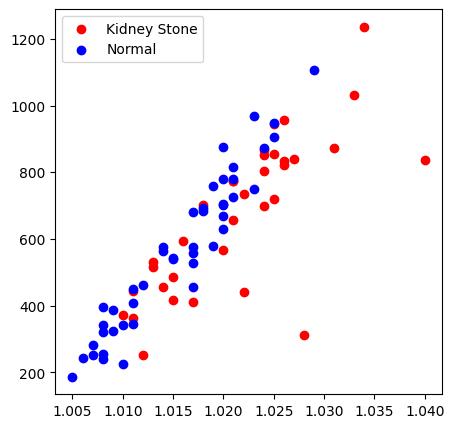

In [30]:
plt.figure(figsize=(5,5)) 

plt.scatter(df[df['target']==1]['gravity'],df[df['target']==1]['osmo'], label='Kidney Stone', color="red")
plt.scatter(df[df['target']==0]['gravity'],df[df['target']==0]['osmo'], label='Normal', color="blue")
plt.legend()
plt.show()

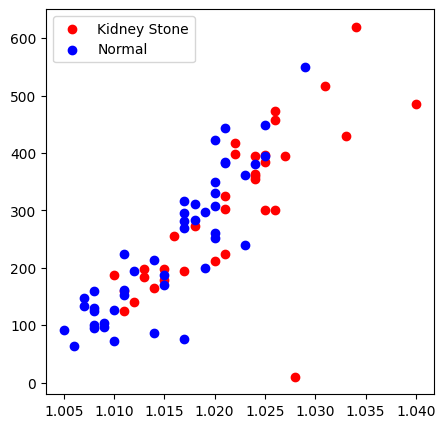

In [32]:
plt.figure(figsize=(5,5)) 

plt.scatter(df[df['target']==1]['gravity'],df[df['target']==1]['urea'], label='Kidney Stone', color="red")
plt.scatter(df[df['target']==0]['gravity'],df[df['target']==0]['urea'], label='Normal', color="blue")
plt.legend()
plt.show()

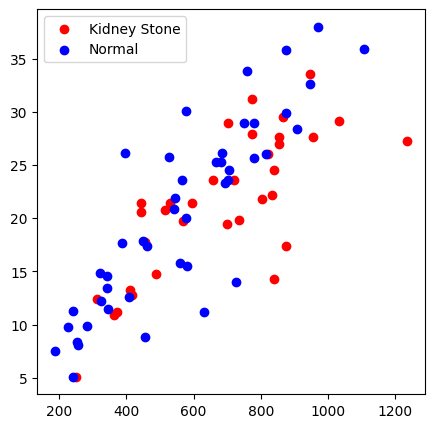

In [33]:
plt.figure(figsize=(5,5)) 

plt.scatter(df[df['target']==1]['osmo'],df[df['target']==1]['cond'], label='Kidney Stone', color="red")
plt.scatter(df[df['target']==0]['osmo'],df[df['target']==0]['cond'], label='Normal', color="blue")
plt.legend()
plt.show()

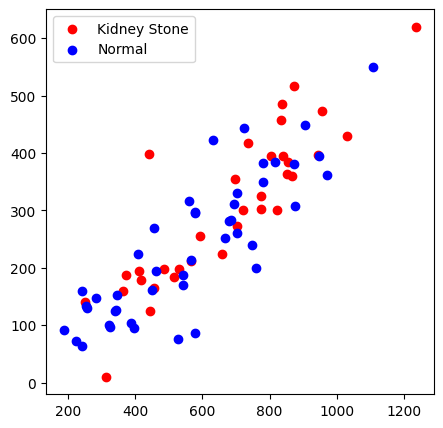

In [34]:

plt.figure(figsize=(5,5)) 

plt.scatter(df[df['target']==1]['osmo'],df[df['target']==1]['urea'], label='Kidney Stone', color="red")
plt.scatter(df[df['target']==0]['osmo'],df[df['target']==0]['urea'], label='Normal', color="blue")
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9596\1787731146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==1]['osmo'], label='Kidney Stone', palette="summer")
C:\Users\user\AppData\Local\Temp\ipykernel_9596\1787731146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==0]['osmo'], label='Normal', palette="winter", alpha=0.5)


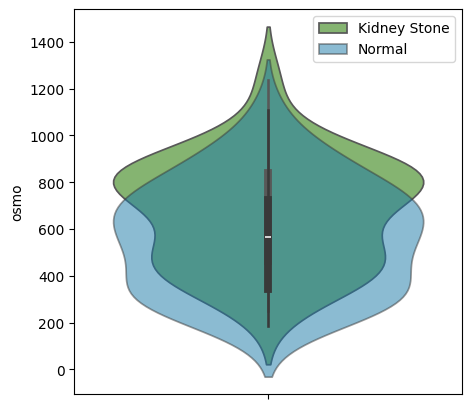

In [43]:
plt.figure(figsize=(5,5)) 

sns.violinplot(df[df['target']==1]['osmo'], label='Kidney Stone', palette="summer")
sns.violinplot(df[df['target']==0]['osmo'], label='Normal', palette="winter", alpha=0.5)
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9596\543782717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==1]['urea'], label='Kidney Stone', palette="summer")
C:\Users\user\AppData\Local\Temp\ipykernel_9596\543782717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==0]['urea'], label='Normal', palette="winter", alpha=0.5)


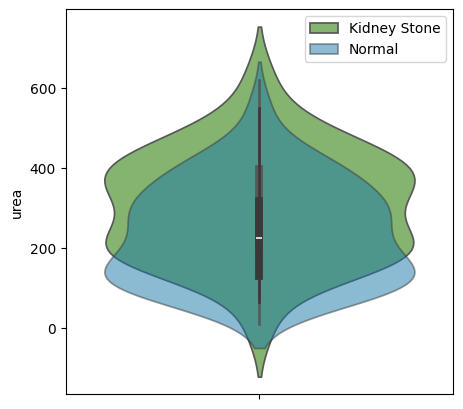

In [44]:
plt.figure(figsize=(5,5)) 

sns.violinplot(df[df['target']==1]['urea'], label='Kidney Stone', palette="summer")
sns.violinplot(df[df['target']==0]['urea'], label='Normal', palette="winter", alpha=0.5)
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9596\2657976396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==1]['cond'], label='Kidney Stone', palette="summer")
C:\Users\user\AppData\Local\Temp\ipykernel_9596\2657976396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==0]['cond'], label='Normal', palette="winter", alpha=0.5)


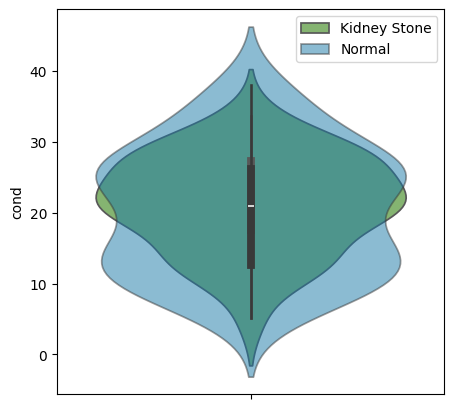

In [45]:
plt.figure(figsize=(5,5)) 

sns.violinplot(df[df['target']==1]['cond'], label='Kidney Stone', palette="summer")
sns.violinplot(df[df['target']==0]['cond'], label='Normal', palette="winter", alpha=0.5)
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9596\1514938569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==1]['gravity'], label='Kidney Stone', palette="summer")
C:\Users\user\AppData\Local\Temp\ipykernel_9596\1514938569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df[df['target']==0]['gravity'], label='Normal', palette="winter", alpha=0.5)


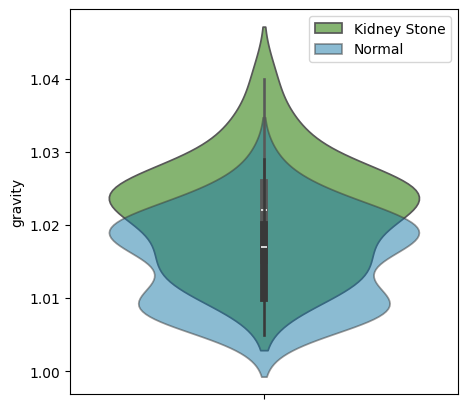

In [46]:
plt.figure(figsize=(5,5)) 

sns.violinplot(df[df['target']==1]['gravity'], label='Kidney Stone', palette="summer")
sns.violinplot(df[df['target']==0]['gravity'], label='Normal', palette="winter", alpha=0.5)
plt.legend()
plt.show()

In [48]:
df.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

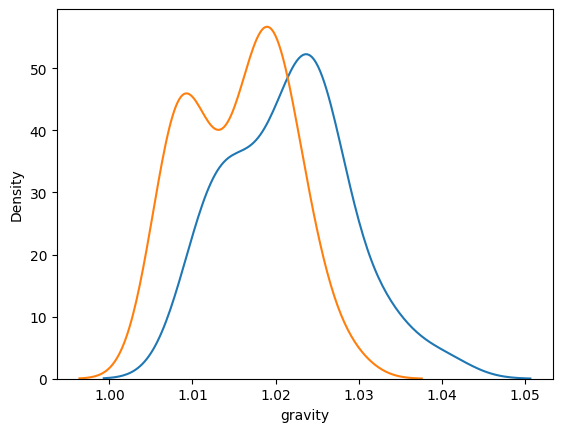

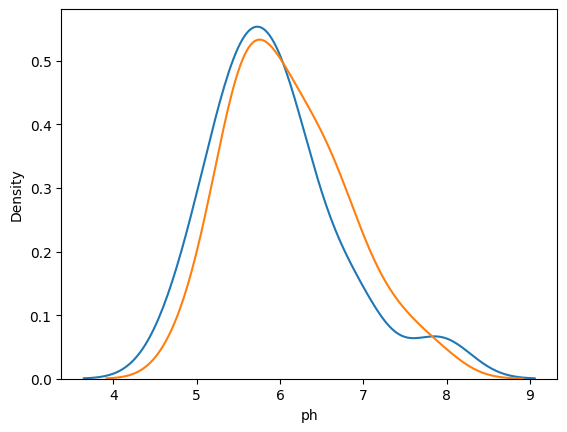

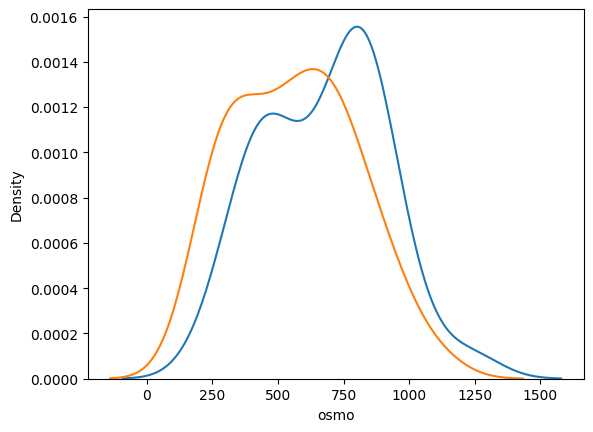

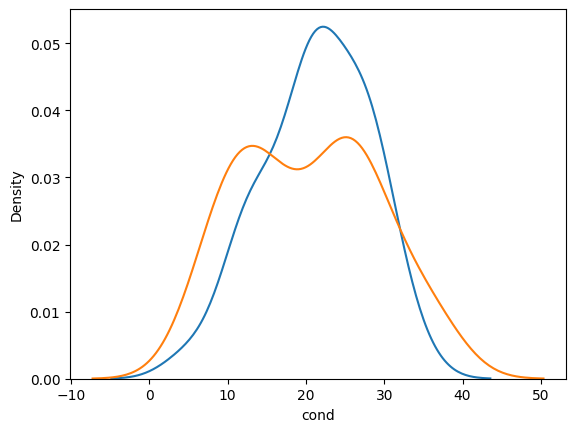

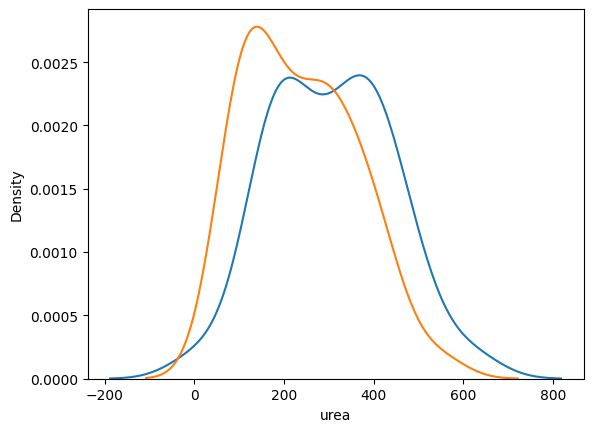

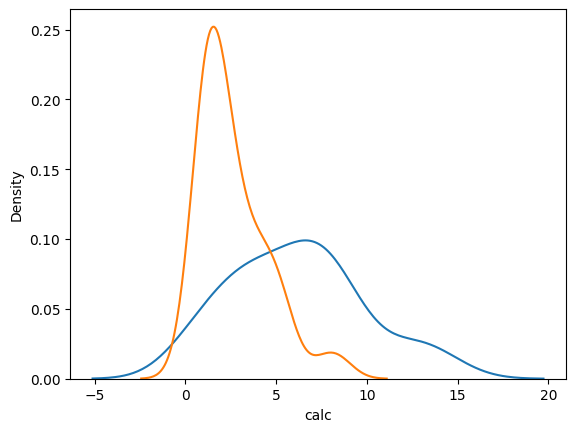

In [56]:
for i, col in enumerate(data):
    sns.kdeplot(df[df['target']==1][col])
    sns.kdeplot(df[df['target']==0][col])
    plt.show()